**Categorical Features**

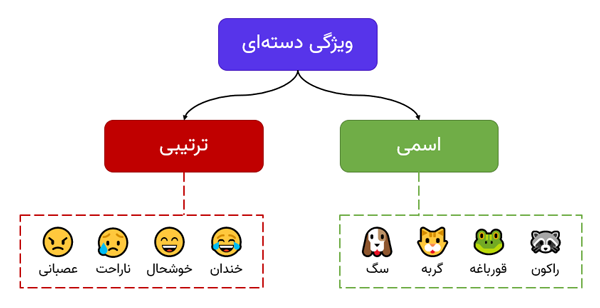

In [1]:
import pandas as pd
# reading the dataset
df = pd.read_csv('beijing.csv', encoding='gbk', low_memory=False)
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,price_category
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,2005,Simplicity,steel-concrete composite,0.217,has elevator,no,has subway,7,56021.0,average
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,2004,hardcover,steel-concrete composite,0.667,has elevator,yes,no subway,7,71539.0,average
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,2005,Simplicity,steel-concrete composite,0.500,has elevator,no,no subway,7,48160.0,average
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,2008,other,steel-concrete composite,0.273,has elevator,no,no subway,6,51238.0,cheap
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,1960,rough,mixed,0.333,no elevator,yes,has subway,1,62588.0,average


In [2]:
df['renovationCondition'].value_counts()

renovationCondition
other         118746
hardcover     117438
Simplicity     77251
rough           5390
Name: count, dtype: int64

In [3]:
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2053
constructionTime            0
renovationCondition        26
buildingStructure          28
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
price_category              0
dtype: int64

In [4]:
mapping = {'other': 0,
           'hardcover' : 1,
           'Simplicity' : 2,
           'rough' : 3}

df['Mapping'] = df['renovationCondition'].map(mapping)

df['Mapping'].value_counts()

Mapping
0.0    118746
1.0    117438
2.0     77251
3.0      5390
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['LabelEncoding'] = label_encoder.fit_transform(df['renovationCondition'])

df['LabelEncoding'].value_counts()

LabelEncoding
2    118746
1    117438
0     77251
3      5390
4        26
Name: count, dtype: int64

In [6]:
dummies = pd.get_dummies(df['renovationCondition'])
dummies.head()

,Simplicity,hardcover,other,rough
0,True,False,False,False
1,False,True,False,False
2,True,False,False,False
3,False,False,True,False
4,False,False,False,True


In [7]:
encoded_df = pd.concat([df, dummies], axis=1)

In [8]:
encoded_df

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,subway,district,communityAverage,price_category,Mapping,LabelEncoding,Simplicity,hardcover,other,rough
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,has subway,7,56021.0,average,2.0,0,True,False,False,False
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,no subway,7,71539.0,average,1.0,1,False,True,False,False
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,no subway,7,48160.0,average,2.0,0,True,False,False,False
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,no subway,6,51238.0,cheap,0.0,2,False,False,True,False
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,has subway,1,62588.0,average,3.0,3,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,no subway,3,36545.0,cheap,0.0,2,False,False,True,False
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,has subway,3,54282.0,average,0.0,2,False,False,True,False
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,no subway,3,46927.0,average,2.0,0,True,False,False,False
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,no subway,3,54842.0,average,1.0,1,False,True,False,False


Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['followers_scaled']] = scaler.fit_transform(df[['followers']])
df[['followers_scaled']]

,followers_scaled
0,0.092738
1,0.110236
2,0.041995
3,0.120735
4,0.250219
...,...
318846,0.006999
318847,0.000875
318848,0.001750
318849,0.003500


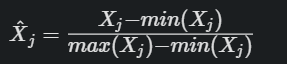

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['ladderRatio_scaled']] = scaler.fit_transform(df[['ladderRatio']])

In [11]:
df[['ladderRatio_scaled']]

,ladderRatio_scaled
0,-0.002511
1,-0.002493
2,-0.002500
3,-0.002509
4,-0.002506
...,...
318846,-0.002506
318847,-0.002511
318848,-0.002500
318849,-0.002500


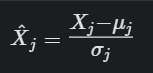

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>carat</code>|وزن الماس به معیار قیراط|
|<code>cut</code>|کیفیت تراش‌خوردگی الماس|
|<code>color</code>|رنگ الماس از J(بدترین) تا D (بهترین)|
|<code>clarity</code>|معیار شفافیت الماس (از چپ به راست از بدترین به بهترین: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
|<code>x</code>|طول الماس به میلی‌متر|
|<code>y</code>|عرض الماس به میلی‌متر|
|<code>z</code>|عمق الماس به میلی‌متر|
|<code>depth</code>|عمق درصدی که برابر است با z / mean(x,y)|
|<code>table</code>|عرض عریض‌ترین نقطه بالایی الماس|
|<code>price</code>|قیمت الماس|

</font>
</div>
</center>

**Regression**

In [12]:
import pandas as pd

train = pd.read_csv('diamonds_train.csv')
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
import pandas as pd

test = pd.read_csv('diamonds_test.csv')
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59
1,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
2,1.55,Premium,I,VS1,58.2,60.0,7.69,7.59,4.45
3,0.46,Good,F,IF,56.2,61.0,5.16,5.24,2.92
4,1.10,Very Good,F,VS2,60.6,58.0,6.67,6.77,4.07


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [15]:
train.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
cut_encodeing = {
    "Fair" : 0,
    "Good" : 1,
    "Very Good" : 2,
    "Premium" : 3,
    "Ideal" : 4,
}

train['cut'].replace(cut_encodeing, inplace=True)
train.head()

C:\Users\ABNS\AppData\Local\Temp\ipykernel_11052\1682415994.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['cut'].replace(cut_encodeing, inplace=True)
C:\Users\ABNS\AppData\Local\Temp\ipykernel_11052\1682415994.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['cut'].replace(cut_e

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
train.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [26]:
color_encodeing = {
    "D" : 6,
    "E" : 5,
    "F" : 4,
    "G" : 3,
    "H" : 2,
    "I" : 1,
    "J" : 0,
}

train['color'].replace(color_encodeing, inplace=True)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [19]:
train.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [25]:
clarity_encodeing = {
    "I1" : 0,
    "SI2" : 1,
    "SI1" : 2,
    "VS2" : 3,
    "VS1" : 4,
    "VVS2" : 5,
    "VVS1" : 6,
    "IF" : 7,
}

train['clarity'].replace(clarity_encodeing, inplace=True)
train.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [24]:
test['cut'].replace(cut_encodeing, inplace=True)
test['color'].replace(color_encodeing, inplace=True)
test['clarity'].replace(clarity_encodeing, inplace=True)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,4,3,5,61.9,55.0,5.83,5.77,3.59
1,0.61,3,4,5,59.7,58.0,5.56,5.53,3.31
2,1.55,3,1,4,58.2,60.0,7.69,7.59,4.45
3,0.46,1,4,7,56.2,61.0,5.16,5.24,2.92
4,1.10,2,4,3,60.6,58.0,6.67,6.77,4.07


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = train.drop('price', axis=1)
y = train.price
X_train, X_val , y_train, y_val = train_test_split(X, y, test_size=.2, random_state=313)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
r2_score(y_val, y_pred)

0.907731387213974